In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Psuedo code (Discrete Bayes)
#       Initialization
#
#1. Initialize our belief in the state
#
#       Predict
#
#1. Based on the system behavior, predict state at the next time step
#2. Adjust belief to account for the uncertainty in prediction
#
#       Update
#
#1. Get a measurement and associated belief about its accuracy
#2. Compute residual between estimated state and measurement
#3. Determine whether the measurement matches each state
#4. Update state belief if it matches the measurement


In [16]:
def scaled_update(states, priori, z, z_prob): 
    # Use bayes rule to update posterior belief
    # Likelihood: based on measurement
    scale  = z_prob / (1. - z_prob)

    likelihood = np.ones((len(priori),))
    likelihood /= np.sum(likelihood)
    likelihood[states==z] *= scale
    # Posterior update: likelihood * prior
    posterior = likelihood * priori # P(x|Z) = P(Z|x)*P(x)
    return posterior / np.sum(posterior) #normalized

def predict_move(belief, move, p_z):
    # The belief is the pdf of current state.
    # move is the measurement (z) with a distribution p_z
    """ move the position by `move` spaces, where positive is 
    to the right, and negative is to the left
    """
    prior = np.convolve(np.roll(belief, move), p_z, mode='same')
    return prior

def discrete_bayes(belief, tstates, move, pmov_z, z, z_prob):
    # Predict
    prior     = predict_move(belief, move, pmov_z)
    # Update
    belief = scaled_update(tstates, prior, z, z_prob)
    return belief

Consider a scenario in which we can sense the movement (step) and state (door) of a person
We will implement a filter that: 
1.  Updates the posterior probability of a person being at each pos (based on prior and likelihood)
2.  Updates the prior prediction of a person being at each pos (based on step sensor (z) and p_z) 


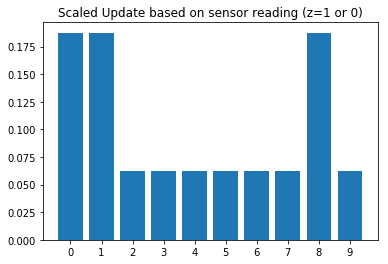

The Probability distribution of being at position 0-9 based on two conditions:
Bayes rule ==> Posterior = normalized(Likelihood * priori)
	- Priori --> distribution of positions 
	- likelihood --> probability given a sensor state (z == 1)

probability of door = 0.1875
probability of wall = 0.0625


In [54]:
print("Consider a scenario in which we can sense the movement (step) and state (door) of a person")
print("We will implement a filter that: ")
print("1.  Updates the posterior probability of a person being at each pos (based on prior and likelihood)")
print("2.  Updates the prior prediction of a person being at each pos (based on step sensor (z) and p_z) ")

belief = np.array([0.1] * 10)
hallway = np.array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0])
options = np.arange(len(hallway))
# This is an example of using a scaled update about the belief of a state based on a sensor reading (z)
posterior = scaled_update(hallway, belief, z=1, z_prob=.75)

plt.bar(options,posterior,align='center')
plt.xticks(options, options)
plt.title('Scaled Update based on sensor reading (z=1 or 0)')
plt.show()
print('The Probability distribution of being at position 0-9 based on two conditions:')
print('Bayes rule ==> Posterior = normalized(Likelihood * priori)')
print('\t- Priori --> distribution of positions ')
print('\t- likelihood --> probability given a sensor state (z == 1)\n')
print('probability of door =', posterior[0])
print('probability of wall =', posterior[2])



Now imagine that we are confident that 1 person started at position 3
moved 3 positions with sensory accuracy of...


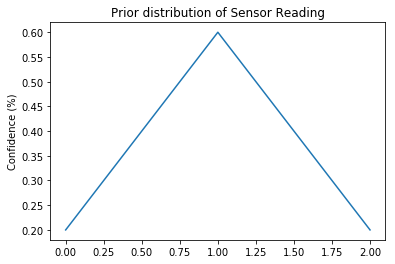

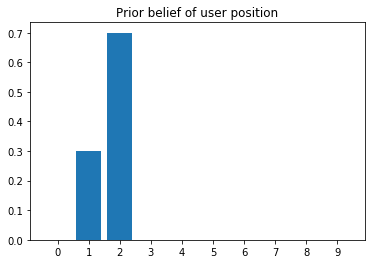

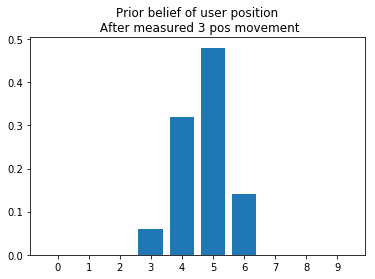

In [55]:
print('\nNow imagine that we are confident that 1 person started at position 3')
print('moved 3 positions with sensory accuracy of...')
pos   = np.array([0, 0.3, 0.7, 0, 0, 0, 0, 0, 0, 0])
p_z   = np.array([0.2,0.6,0.2])
pos2  = predict_move(pos,3,p_z)

# Visualize
plt.plot(p_z)
plt.ylabel('Confidence (%)')
plt.title('Prior distribution of Sensor Reading')
plt.show()

plt.bar(options,pos,align='center')
plt.xticks(options, options)
plt.title('Prior belief of user position')
plt.show()

plt.bar(options,pos2,align='center')
plt.xticks(options, options)
plt.title('Prior belief of user position\n After measured 3 pos movement')
plt.show()

Put the two steps together to visualize the filter accuracy of: 
	- predicting the user pos
	- updating the system model
on each epoch

Context: The person is initially positioned at position 0
	... and will move 1 step to the right at each epoch...
Epoch 0


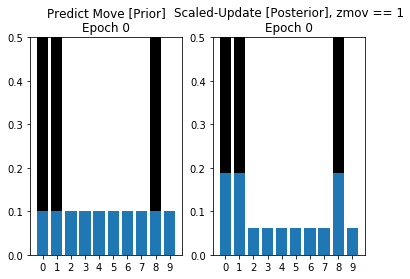

Epoch 1


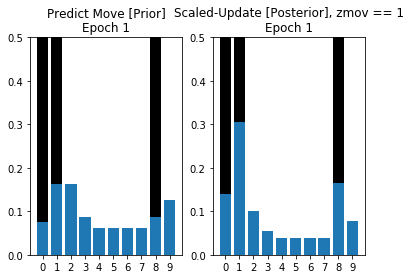

Epoch 2


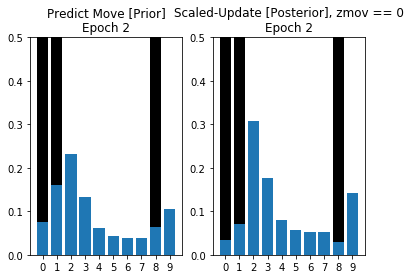

Epoch 3


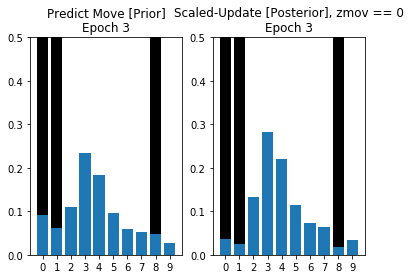

In [13]:
print("Put the two steps together to visualize the filter accuracy of: ")
print("\t- predicting the user pos\n\t- updating the system model")
print("on each epoch")
print("\nContext: The person is initially positioned at position 0\n\t... and will move 1 step to the right at each epoch...")
hallway = np.array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0])
prior   = np.array([.1] * 10)
options = np.arange(len(hallway))
pmov_z   = np.array([0.2,0.6,0.2])
# Epoch 0
posterior = scaled_update(hallway, prior, z=1, z_prob=.75)
print("Epoch 0")
plt.subplot(121)
plt.bar(options,hallway,align='center',color='k')
plt.bar(options,prior,align='center')
plt.xticks(options, options)
plt.ylim([0,0.5])
plt.title('Predict Move [Prior]\nEpoch 0')
plt.subplot(122)
plt.bar(options,hallway,align='center',color='k')
plt.bar(options,posterior,align='center')
plt.xticks(options, options)
plt.ylim([0,0.5])
plt.title('Scaled-Update [Posterior], zmov == 1\nEpoch 0')
plt.show()
# Epoch 1
prior     = predict_move(posterior,1,pmov_z)
posterior = scaled_update(hallway, prior, z=1, z_prob=.75)
print("Epoch 1")
plt.subplot(121)
plt.bar(options,hallway,align='center',color='k')
plt.bar(options,prior,align='center')
plt.xticks(options, options)
plt.ylim([0,0.5])
plt.title('Predict Move [Prior]\nEpoch 1')
plt.subplot(122)
plt.bar(options,hallway,align='center',color='k')
plt.bar(options,posterior,align='center')
plt.xticks(options, options)
plt.ylim([0,0.5])
plt.title('Scaled-Update [Posterior], zmov == 1\nEpoch 1')
plt.show()
# Epoch 2
prior     = predict_move(posterior,1,pmov_z)
posterior = scaled_update(hallway, prior, z=0, z_prob=.75)
print("Epoch 2")
plt.subplot(121)
plt.bar(options,hallway,align='center',color='k')
plt.bar(options,prior,align='center')
plt.xticks(options, options)
plt.ylim([0,0.5])
plt.title('Predict Move [Prior]\nEpoch 2')
plt.subplot(122)
plt.bar(options,hallway,align='center',color='k')
plt.bar(options,posterior,align='center')
plt.xticks(options, options)
plt.ylim([0,0.5])
plt.title('Scaled-Update [Posterior], zmov == 0\nEpoch 2')
plt.show()
print("Epoch 3")
prior     = predict_move(posterior,1,pmov_z)
posterior = scaled_update(hallway, prior, z=0, z_prob=.75)
plt.subplot(121)
plt.bar(options,hallway,align='center',color='k')
plt.bar(options,prior,align='center')
plt.xticks(options, options)
plt.ylim([0,0.5])
plt.title('Predict Move [Prior]\nEpoch 3')
plt.subplot(122)
plt.bar(options,hallway,align='center',color='k')
plt.bar(options,posterior,align='center')
plt.xticks(options, options)
plt.ylim([0,0.5])
plt.title('Scaled-Update [Posterior], zmov == 0\nEpoch 3')
plt.show()

NOTE: DB-filter still maintains it's robustness, after accounting for sensor inaccuracies
-  Movement sensor is modeled by a confidence kernel  [ 0.2  0.6  0.2]
-  State sensor is retaines a 0.90 accuracy
Number of False State recordings: 9, at epochs:
[8, 30, 38, 43, 45, 47, 76, 82, 90]


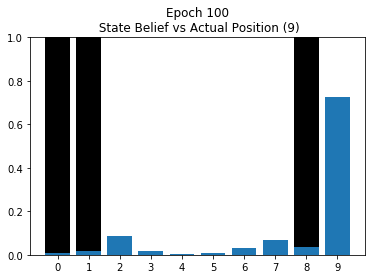

The model predicts the state to be 9 with 0.73 confidence


In [49]:
# Compact form of Discrete Bayes
# Step1: Initialization
states  = np.array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0])
options = np.arange(len(states))
prior   = np.array([.1] * 10)      # Initial prior distribution
pmov_z  = np.array([0.2,0.6,0.2])  # confidence in move sensor
z_prob  = 0.9                      # confidence in state sensor
# Run discrete Bayes for 100 epochs
nfstates = []
for x in range(100):
    fstate = np.random.random()
    pos = x % len(states)
    z = states[pos] # state position
    if fstate > z_prob:
        nfstates.append(x)
        if z == 1:
            z = 0
        else:
            z = 1
    belief = discrete_bayes(belief, states,1,pmov_z, z, z_prob)
    
# Visualize accuracy of Discrete Bayes filter
print("NOTE: DB-filter still maintains it's robustness, after accounting for sensor inaccuracies")
print("-  Movement sensor is modeled by a confidence kernel ",pmov_z)
print("-  State sensor is retaines a %.2f accuracy" % z_prob)
print("Number of False State recordings: %d, at epochs:"% len(nfstates))
print(nfstates)

plt.bar(options,states,align='center',color='k')
plt.bar(options,belief,align='center')
plt.xticks(options, options)
plt.ylim([0,1])
plt.title('Epoch 100\n State Belief vs Actual Position (%d)' % pos)
plt.show()
predictpos = np.argmax(belief)
print("The model predicts the state to be %d with %.2f confidence"%(predictpos,belief[predictpos]))